Nama : Nabilah Sofieyanti

Proyek Pertama : Membuat Model NLP dengan TensorFlow

Belajar Pengembangan Machine Learning

In [12]:
#import library
import pandas as pd 

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('IMDB Dataset.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [14]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [15]:
#melakukan one hot encoding karena label berupa data karegorikal
sentiment = pd.get_dummies(df.sentiment)
df_baru = pd.concat([df, sentiment], axis=1)
df_baru = df_baru.drop(columns='sentiment')
df_baru

,review,negative,positive
0,One of the other reviewers has mentioned that ...,0,1
1,A wonderful little production. <br /><br />The...,0,1
2,I thought this was a wonderful way to spend ti...,0,1
3,Basically there's a family where a little boy ...,1,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",0,1
...,...,...,...
49995,I thought this movie did a down right good job...,0,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",1,0
49997,I am a Catholic taught in parochial elementary...,1,0
49998,I'm going to have to disagree with the previou...,1,0


In [16]:
#mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array menggunakan atribut values.
review = df_baru['review'].values
label = df_baru[['negative', 'positive']].values

In [17]:
#bagi data untuk data training dan data test
review_train, review_test, label_train, label_test = train_test_split(review, label, test_size=0.2)

In [18]:
#melakukan tokenisasi pada data latih dan data test

 #tokenisasi
tokenizer = Tokenizer(num_words=250, oov_token='x')
tokenizer.fit_on_texts(review_train)
tokenizer.fit_on_texts(review_test)
 
#sequences
sequences_train = tokenizer.texts_to_sequences(review_train)
sequences_test = tokenizer.texts_to_sequences(review_test)
 
#padding
padded_train = pad_sequences(sequences_train) 
padded_test = pad_sequences(sequences_test)

In [19]:
#arsitektur model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=250, output_dim=16), 
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid'),
])

#optimizer dan loss
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
#callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85) and (logs.get('val_accuracy')>0.85):
      print("\nAkurasi telah mencapai >85%!")
      self.model.stop_training = True
callbacks = myCallback()

In [21]:
#pelatihan model
num_epochs = 30
history = model.fit(padded_train, label_train, epochs=num_epochs, callbacks=[callbacks], 
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/30
1250/1250 - 86s - loss: 0.5957 - accuracy: 0.6773 - val_loss: 0.6867 - val_accuracy: 0.6059 - 86s/epoch - 69ms/step
Epoch 2/30
1250/1250 - 83s - loss: 0.6339 - accuracy: 0.6419 - val_loss: 0.6156 - val_accuracy: 0.6841 - 83s/epoch - 66ms/step
Epoch 3/30
1250/1250 - 85s - loss: 0.5735 - accuracy: 0.7197 - val_loss: 0.5119 - val_accuracy: 0.7485 - 85s/epoch - 68ms/step
Epoch 4/30
1250/1250 - 83s - loss: 0.5819 - accuracy: 0.7042 - val_loss: 0.5513 - val_accuracy: 0.7423 - 83s/epoch - 67ms/step
Epoch 5/30
1250/1250 - 82s - loss: 0.5739 - accuracy: 0.7066 - val_loss: 0.4918 - val_accuracy: 0.7674 - 82s/epoch - 66ms/step
Epoch 6/30
1250/1250 - 83s - loss: 0.5256 - accuracy: 0.7516 - val_loss: 0.5255 - val_accuracy: 0.7616 - 83s/epoch - 66ms/step
Epoch 7/30
1250/1250 - 83s - loss: 0.5202 - accuracy: 0.7496 - val_loss: 0.4781 - val_accuracy: 0.7625 - 83s/epoch - 67ms/step
Epoch 8/30
1250/1250 - 83s - loss: 0.5441 - accuracy: 0.7363 - val_loss: 0.5070 - val_accuracy: 0.7582 - 83s/ep

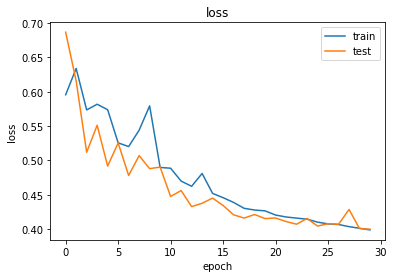

In [22]:
#plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

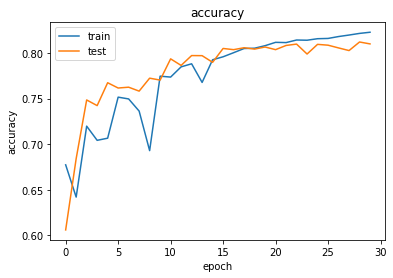

In [23]:
#plot akurasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()